# 10 Minutes to Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 객체 생성 (Object Creation)

In [3]:
# 시리즈(Series) 생성
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# 날짜 인덱스를 가진 데이터프레임(DataFrame) 생성
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.890514,-2.208632,0.671549,-2.841726
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-04,0.500580,1.014609,-2.193276,0.374499
2013-01-05,-1.012681,0.282695,0.500957,-0.882033
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461


In [6]:
# 딕셔너리를 통한 데이터프레임 생성
df2 = pd.DataFrame(
    {
        "A": 1.,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## 2. 데이터 확인 (Viewing Data)

In [8]:
# 상위, 하위 데이터 확인
df.tail(3) # 끝에서 마지막 3줄을 불러옴
df.tail() # 끝에서 마지막 5줄을 불러옴

,A,B,C,D
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-04,0.500580,1.014609,-2.193276,0.374499
2013-01-05,-1.012681,0.282695,0.500957,-0.882033
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461


In [9]:
df.head() # 처음 5줄 출력

,A,B,C,D
2013-01-01,-0.890514,-2.208632,0.671549,-2.841726
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-04,0.500580,1.014609,-2.193276,0.374499
2013-01-05,-1.012681,0.282695,0.500957,-0.882033


In [10]:
df.tail(3) 

,A,B,C,D
2013-01-04,0.500580,1.014609,-2.193276,0.374499
2013-01-05,-1.012681,0.282695,0.500957,-0.882033
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461


In [11]:
df.index # 인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.values

array([[-0.89051441, -2.20863192,  0.67154879, -2.84172562],
       [-0.00480764,  0.85487543,  0.09288575, -1.24123064],
       [ 0.16268994, -1.44739803,  0.90445991,  0.66828948],
       [ 0.50057954,  1.01460913, -2.1932762 ,  0.37449908],
       [-1.01268101,  0.28269477,  0.50095706, -0.88203331],
       [ 0.56852304, -0.76061696, -0.32893674, -2.17046131]])

In [14]:
df.describe() # 데이터프레임의 통계 정보를 출력

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.112702,-0.377411,-0.058727,-1.015444
std,0.684488,1.306681,1.133718,1.378771
min,-1.012681,-2.208632,-2.193276,-2.841726
25%,-0.669088,-1.275703,-0.223481,-1.938154
50%,0.078941,-0.238961,0.296921,-1.061632
75%,0.416107,0.711830,0.628901,0.060366
max,0.568523,1.014609,0.904460,0.668289


In [15]:
df.T # 데이터를 전치한다. (인덱스와 열을 바꿈)

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.890514,-0.004808,0.162690,0.500580,-1.012681,0.568523
B,-2.208632,0.854875,-1.447398,1.014609,0.282695,-0.760617
C,0.671549,0.092886,0.904460,-2.193276,0.500957,-0.328937
D,-2.841726,-1.241231,0.668289,0.374499,-0.882033,-2.170461


In [16]:
df.sort_index(axis = 1, ascending = False) # 내림차순으로 인덱스 정렬

,D,C,B,A
2013-01-01,-2.841726,0.671549,-2.208632,-0.890514
2013-01-02,-1.241231,0.092886,0.854875,-0.004808
2013-01-03,0.668289,0.904460,-1.447398,0.162690
2013-01-04,0.374499,-2.193276,1.014609,0.500580
2013-01-05,-0.882033,0.500957,0.282695,-1.012681
2013-01-06,-2.170461,-0.328937,-0.760617,0.568523


In [17]:
df.sort_values(by="B") # B 컬럼의 값을 오름차순 기준으로 정렬(다른 컬럼은 인덱스에 맞춰 값이 변함)

,A,B,C,D
2013-01-01,-0.890514,-2.208632,0.671549,-2.841726
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461
2013-01-05,-1.012681,0.282695,0.500957,-0.882033
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-04,0.500580,1.014609,-2.193276,0.374499


## 3. 선택 (Selection)

In [18]:
# 주석 (Note) : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 
# 코드 작성을 위한 양방향 작업에 유용하지만 
# 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천합니다.
# 데이터 인덱싱 및 선택 문서와 다중 인덱싱 / 심화 인덱싱 문서를 참조하세요.

In [19]:
df['A'] # A 열 시리즈 출력

2013-01-01   -0.890514
2013-01-02   -0.004808
2013-01-03    0.162690
2013-01-04    0.500580
2013-01-05   -1.012681
2013-01-06    0.568523
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3] # 0~2행 출력

,A,B,C,D
2013-01-01,-0.890514,-2.208632,0.671549,-2.841726
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289


In [21]:
df['20130102':'20130104'] # 날짜 인덱스에 맞는 데이터프레임 출력

,A,B,C,D
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-04,0.500580,1.014609,-2.193276,0.374499


In [22]:
df.loc[dates[0]] # 0번째 인덱스의 행 데이터값

A   -0.890514
B   -2.208632
C    0.671549
D   -2.841726
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:,['A','B']] # 모든 인덱스의 A와 B 컬럼 값

,A,B
2013-01-01,-0.890514,-2.208632
2013-01-02,-0.004808,0.854875
2013-01-03,0.162690,-1.447398
2013-01-04,0.500580,1.014609
2013-01-05,-1.012681,0.282695
2013-01-06,0.568523,-0.760617


In [24]:
df.loc['20130102':'20130104', ['A', 'B']] # 20130102~20130104의 A, B 컬럼

,A,B
2013-01-02,-0.004808,0.854875
2013-01-03,0.162690,-1.447398
2013-01-04,0.500580,1.014609


In [25]:
df.loc['20130102',['A','B']] # 20130102 인덱스의 A, B 컬럼

A   -0.004808
B    0.854875
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
df.loc[dates[0],'A'] # 0번쨰 인덱스의 A 컬럼의 값

np.float64(-0.8905144065505401)

In [27]:
df.at[dates[0], "A"] # 위에와 똑같음

np.float64(-0.8905144065505401)

In [28]:
df.iloc[3] # 3번째 인덱스

A    0.500580
B    1.014609
C   -2.193276
D    0.374499
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
df.iloc[3:5, 0:2] # 3번째 ~ 4번째 행, 0번째 ~ 1번째 열

,A,B
2013-01-04,0.500580,1.014609
2013-01-05,-1.012681,0.282695


In [30]:
df.iloc[[1,2,4],[0,2]] # 1,2,4 인덱스와, 0,2 컬럼 선택

,A,C
2013-01-02,-0.004808,0.092886
2013-01-03,0.162690,0.904460
2013-01-05,-1.012681,0.500957


In [31]:
df.iloc[1:3,:] # 1 ~ 2행과 모든 열

,A,B,C,D
2013-01-02,-0.004808,0.854875,0.092886,-1.241231
2013-01-03,0.162690,-1.447398,0.904460,0.668289


In [32]:
df.iloc[:,1:3] # 모든 행과 1열, 2열

,B,C
2013-01-01,-2.208632,0.671549
2013-01-02,0.854875,0.092886
2013-01-03,-1.447398,0.904460
2013-01-04,1.014609,-2.193276
2013-01-05,0.282695,0.500957
2013-01-06,-0.760617,-0.328937


In [33]:
df.iloc[1,1] # 두 번째 행과 두 번째 열

np.float64(0.8548754307772486)

In [34]:
df.iat[1,1] # 위에와 동일

np.float64(0.8548754307772486)

In [35]:
df[df.A > 0] # A열의 값이 0보다 큰 행

,A,B,C,D
2013-01-03,0.162690,-1.447398,0.904460,0.668289
2013-01-04,0.500580,1.014609,-2.193276,0.374499
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461


In [36]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.671549,NaN
2013-01-02,NaN,0.854875,0.092886,NaN
2013-01-03,0.162690,NaN,0.904460,0.668289
2013-01-04,0.500580,1.014609,NaN,0.374499
2013-01-05,NaN,0.282695,0.500957,NaN
2013-01-06,0.568523,NaN,NaN,NaN


In [37]:
df2 = df.copy() # 데이터프레임 복사

In [38]:
df2['E'] = ['one', 'one', 'two', 'three','four','three'] # 카테고리

In [39]:
df2 # 데이터프레임 출력

,A,B,C,D,E
2013-01-01,-0.890514,-2.208632,0.671549,-2.841726,one
2013-01-02,-0.004808,0.854875,0.092886,-1.241231,one
2013-01-03,0.162690,-1.447398,0.904460,0.668289,two
2013-01-04,0.500580,1.014609,-2.193276,0.374499,three
2013-01-05,-1.012681,0.282695,0.500957,-0.882033,four
2013-01-06,0.568523,-0.760617,-0.328937,-2.170461,three


In [40]:
df2[df2['E'].isin(['two', 'four'])] # E 컬럼이 'two' 또는 'four'인 데이터

,A,B,C,D,E
2013-01-03,0.162690,-1.447398,0.904460,0.668289,two
2013-01-05,-1.012681,0.282695,0.500957,-0.882033,four


In [41]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range("20130102", periods=6))

In [42]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [43]:
df['F'] = s1 # s1을 df의 'F' 열로 추가

In [44]:
df.at[dates[0], 'A'] = 0 # A열의 첫번째 값을 0으로 변경

In [45]:
df.iat[0,1] = 0 # 0번째 인덱스의 1번째 컬럼 값을 0으로 변경

In [46]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.671549,5.0,NaN
2013-01-02,-0.004808,0.854875,0.092886,5.0,1.0
2013-01-03,0.162690,-1.447398,0.904460,5.0,2.0
2013-01-04,0.500580,1.014609,-2.193276,5.0,3.0
2013-01-05,-1.012681,0.282695,0.500957,5.0,4.0
2013-01-06,0.568523,-0.760617,-0.328937,5.0,5.0


In [48]:
df2 = df.copy()

In [49]:
df2[df2 > 0] = -df2

In [50]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.671549,-5.0,NaN
2013-01-02,-0.004808,-0.854875,-0.092886,-5.0,-1.0
2013-01-03,-0.162690,-1.447398,-0.904460,-5.0,-2.0
2013-01-04,-0.500580,-1.014609,-2.193276,-5.0,-3.0
2013-01-05,-1.012681,-0.282695,-0.500957,-5.0,-4.0
2013-01-06,-0.568523,-0.760617,-0.328937,-5.0,-5.0


## 4. 결측치 (Missing Data)

In [51]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])

In [52]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [53]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.671549,5.0,NaN,1.0
2013-01-02,-0.004808,0.854875,0.092886,5.0,1.0,1.0
2013-01-03,0.162690,-1.447398,0.904460,5.0,2.0,NaN
2013-01-04,0.500580,1.014609,-2.193276,5.0,3.0,NaN


In [54]:
df1.dropna(how = 'any') # 결측치가 있는 행 지우기

,A,B,C,D,F,E
2013-01-02,-0.004808,0.854875,0.092886,5.0,1.0,1.0


In [55]:
df1.fillna(value = 5) # 결측치 채우기

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.671549,5.0,5.0,1.0
2013-01-02,-0.004808,0.854875,0.092886,5.0,1.0,1.0
2013-01-03,0.162690,-1.447398,0.904460,5.0,2.0,5.0
2013-01-04,0.500580,1.014609,-2.193276,5.0,3.0,5.0


In [56]:
pd.isna(df1) # 결측치 확인

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5. 연산 (Operations)

In [57]:
df.mean() # 열의 평균

A    0.035717
B   -0.009306
C   -0.058727
D    5.000000
F    3.000000
dtype: float64

In [58]:
df.mean(1) # 행의 평균

2013-01-01    1.417887
2013-01-02    1.388591
2013-01-03    1.323950
2013-01-04    1.464382
2013-01-05    1.754194
2013-01-06    1.895794
Freq: D, dtype: float64

In [59]:
s = pd.Series([1,3,5, np.nan, 6, 8], index = dates).shift(2) 

In [60]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [61]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.837310,-2.447398,-0.095540,4.0,1.0
2013-01-04,-2.499420,-1.985391,-5.193276,2.0,0.0
2013-01-05,-6.012681,-4.717305,-4.499043,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.671549,5.0,NaN
2013-01-02,-0.004808,0.854875,0.764435,10.0,1.0
2013-01-03,0.157882,-0.592523,1.668894,15.0,3.0
2013-01-04,0.658462,0.422087,-0.524382,20.0,6.0
2013-01-05,-0.354219,0.704781,-0.023425,25.0,10.0
2013-01-06,0.214304,-0.055836,-0.352361,30.0,15.0


In [63]:
df.apply(lambda x: x.max() - x.min())

A    1.581204
B    2.462007
C    3.097736
D    0.000000
F    4.000000
dtype: float64

In [64]:
s = pd.Series(np.random.randint(0, 7, size = 10))

In [65]:
s

0    2
1    1
2    4
3    2
4    5
5    3
6    5
7    6
8    0
9    6
dtype: int32

In [66]:
s.value_counts()

2    2
6    2
5    2
4    1
1    1
3    1
0    1
Name: count, dtype: int64

In [67]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [68]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. 병합 (Merge)

In [69]:
df = pd.DataFrame(np.random.randn(10, 4))

In [70]:
df

,0,1,2,3
0,1.041883,0.842655,-1.577180,0.606545
1,-0.113795,0.354232,0.527864,1.163684
2,-1.380577,0.148436,0.478612,-1.359008
3,0.850973,-2.386889,-0.039488,0.706207
4,-1.098153,-1.200902,1.223418,0.230017
5,-0.015586,1.485252,-1.307359,0.905759
6,1.521242,-1.163891,0.862309,1.313502
7,0.194150,0.764556,1.008510,0.520537
8,-1.861840,-1.196949,0.267473,1.356106
9,-1.066492,-0.983493,0.404983,1.081305


In [71]:
pieces = [df[:3], df[3:7], df[7:]] 

In [72]:
pd.concat(pieces) 

,0,1,2,3
0,1.041883,0.842655,-1.577180,0.606545
1,-0.113795,0.354232,0.527864,1.163684
2,-1.380577,0.148436,0.478612,-1.359008
3,0.850973,-2.386889,-0.039488,0.706207
4,-1.098153,-1.200902,1.223418,0.230017
5,-0.015586,1.485252,-1.307359,0.905759
6,1.521242,-1.163891,0.862309,1.313502
7,0.194150,0.764556,1.008510,0.520537
8,-1.861840,-1.196949,0.267473,1.356106
9,-1.066492,-0.983493,0.404983,1.081305


In [73]:
# Join 결합
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})

In [74]:
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval' : [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [78]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

In [79]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [80]:
left

,key,lval
0,foo,1
1,bar,2


In [81]:
right

,key,rval
0,foo,4
1,bar,5


In [82]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [83]:
# Append(추가)
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [84]:
df

,A,B,C,D
0,-0.933546,-0.965490,-0.556692,-0.798808
1,2.269784,-0.349991,0.110929,0.457453
2,-1.443297,0.823792,-1.231637,-0.320791
3,1.196512,0.459422,-1.211214,-1.411084
4,1.619596,1.086068,-0.997275,0.349902
5,1.630517,0.432999,-1.638604,0.237476
6,-1.306467,0.116160,0.459347,-0.874067
7,-2.157511,0.291308,0.098949,0.797999


In [85]:
s = df.iloc[3]

In [86]:
df.append(s, ignore_index = True) # 실행이 안됩니다.

AttributeError: 'DataFrame' object has no attribute 'append'

## 7. 그룹화 (Grouping)

In [87]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [88]:
df

,A,B,C,D
0,foo,one,2.272078,0.980368
1,bar,one,-0.202304,0.448731
2,foo,two,0.239724,-0.052319
3,bar,three,2.835044,-1.998828
4,foo,two,-0.574910,-1.312804
5,bar,two,-0.861066,-0.762632
6,foo,one,2.229003,-0.807745
7,foo,three,-1.197256,-0.316039


In [89]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,1.771675,-2.312730
foo,onetwotwoonethree,2.968638,-1.508539


In [90]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.202304  0.448731
    three  2.835044 -1.998828
    two   -0.861066 -0.762632
foo one    4.501080  0.172623
    three -1.197256 -0.316039
    two   -0.335186 -1.365122

## 8. 변형 (Reshaping)

In [91]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [92]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [93]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [94]:
df2  =  df[:4]

In [95]:
df2

A         B
first second                    
bar   one    -0.865448  0.516560
      two    -0.653433 -1.085271
baz   one     0.671415 -0.357740
      two     0.032313  0.297211

In [96]:
# stack() 메서드는 데이터프레임 열들의 계층을 압축해줌
stacked = df2.stack()

In [97]:
stacked

first  second   
bar    one     A   -0.865448
               B    0.516560
       two     A   -0.653433
               B   -1.085271
baz    one     A    0.671415
               B   -0.357740
       two     A    0.032313
               B    0.297211
dtype: float64

In [98]:
stacked.unstack()

A         B
first second                    
bar   one    -0.865448  0.516560
      two    -0.653433 -1.085271
baz   one     0.671415 -0.357740
      two     0.032313  0.297211

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.865448 -0.653433
      B  0.516560 -1.085271
baz   A  0.671415  0.032313
      B -0.357740  0.297211

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.865448  0.671415
       B  0.516560 -0.357740
two    A -0.653433  0.032313
       B -1.085271  0.297211

In [101]:
# Pivot Tables (피봇 테이블)
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [102]:
df

,A,B,C,D,E
0,one,A,foo,-1.025013,-0.353869
1,one,B,foo,0.147194,-0.555714
2,two,C,foo,0.047686,-0.198999
3,three,A,bar,-0.614099,-0.712516
4,one,B,bar,0.667813,0.152284
5,one,C,bar,-0.267668,-0.255146
6,two,A,foo,-0.955714,0.396895
7,three,B,foo,-0.747592,-0.870293
8,one,C,foo,0.140560,-0.496078
9,one,A,bar,0.688294,1.199096


In [103]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.688294 -1.025013
      B  0.667813  0.147194
      C -0.267668  0.140560
three A -0.614099       NaN
      B       NaN -0.747592
      C -1.282673       NaN
two   A       NaN -0.955714
      B  0.430999       NaN
      C       NaN  0.047686

## 9. 시계열 (Time Series) & 범주형 (Categoricals)

In [104]:
# Pandas는 자주 일어나는 변환 
# (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 
# 사이에 수행하는 리샘플링 연산을 위한 
# 간단하고, 강력하며, 효율적인 함수를 제공합니다. 
# 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다. 
# 시계열 부분을 참고하세요.

In [105]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

C:\Users\parks\AppData\Local\Temp\ipykernel_8304\3206175744.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2012', periods=100, freq='S')


In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [107]:
ts.resample('5Min').sum()

2012-01-01    26891
Freq: 5min, dtype: int32

In [108]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [110]:
ts

2012-03-06    0.656918
2012-03-07   -0.771171
2012-03-08    0.059436
2012-03-09   -0.265280
2012-03-10    1.611500
Freq: D, dtype: float64

In [111]:
ts_utc = ts.tz_localize('UTC')

In [112]:
ts_utc

2012-03-06 00:00:00+00:00    0.656918
2012-03-07 00:00:00+00:00   -0.771171
2012-03-08 00:00:00+00:00    0.059436
2012-03-09 00:00:00+00:00   -0.265280
2012-03-10 00:00:00+00:00    1.611500
Freq: D, dtype: float64

In [113]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.656918
2012-03-06 19:00:00-05:00   -0.771171
2012-03-07 19:00:00-05:00    0.059436
2012-03-08 19:00:00-05:00   -0.265280
2012-03-09 19:00:00-05:00    1.611500
Freq: D, dtype: float64

In [114]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

C:\Users\parks\AppData\Local\Temp\ipykernel_8304\3174866844.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('1/1/2012', periods=5, freq='M')


In [115]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [116]:
ts

2012-01-31    0.971646
2012-02-29    0.721753
2012-03-31   -1.310182
2012-04-30   -0.104746
2012-05-31   -0.764332
Freq: ME, dtype: float64

In [117]:
ps = ts.to_period()

In [118]:
ps

2012-01    0.971646
2012-02    0.721753
2012-03   -1.310182
2012-04   -0.104746
2012-05   -0.764332
Freq: M, dtype: float64

In [119]:
ps.to_timestamp()

2012-01-01    0.971646
2012-02-01    0.721753
2012-03-01   -1.310182
2012-04-01   -0.104746
2012-05-01   -0.764332
Freq: MS, dtype: float64

In [120]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [121]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [122]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

C:\Users\parks\AppData\Local\Temp\ipykernel_8304\3688940089.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [123]:
ts.head()

1990-03-01 09:00    1.447074
1990-06-01 09:00    0.246488
1990-09-01 09:00    0.417110
1990-12-01 09:00   -1.162794
1991-03-01 09:00    0.233435
Freq: h, dtype: float64

## 10. Categoricals (범주화)
### Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 범주형 소개 와 API 문서 부분을 참조하세요.

In [124]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [125]:
df["grade"] = df["raw_grade"].astype("category")

In [126]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [127]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

AttributeError: property 'categories' of 'Categorical' object has no setter

In [128]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [129]:
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [130]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [131]:
df.groupby("grade").size()

C:\Users\parks\AppData\Local\Temp\ipykernel_8304\3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## 11. Plotting (그래프)

In [132]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [133]:
ts = ts.cumsum()

<Axes: >

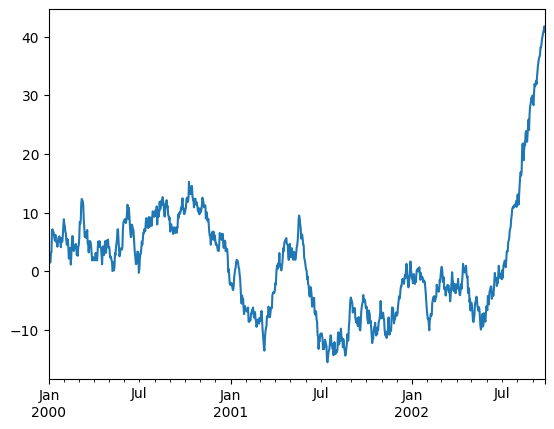

In [134]:
ts.plot()

In [135]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [136]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

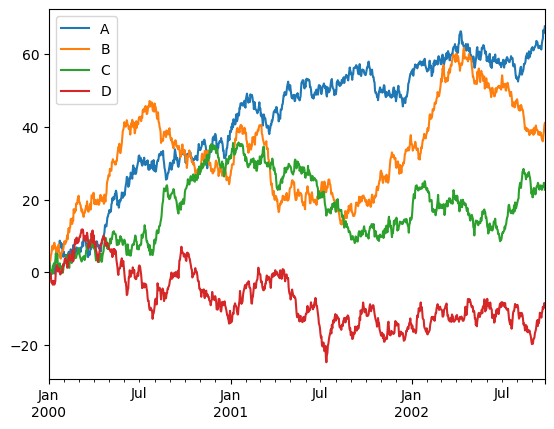

In [137]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

In [138]:
df.to_csv('foo.csv')

In [139]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.562532,0.373080,1.779251,-1.555898
1,2000-01-02,0.400777,1.772726,2.686010,-1.562132
2,2000-01-03,-1.182252,2.858251,1.957534,-0.364288
3,2000-01-04,-1.252953,3.106897,1.425618,-0.216345
4,2000-01-05,-0.855192,4.582395,0.190147,-1.002852
...,...,...,...,...,...
995,2002-09-22,64.265017,36.030056,23.679953,-9.453129
996,2002-09-23,66.613329,37.652725,23.470778,-9.929671
997,2002-09-24,65.811270,38.664579,24.602214,-9.662939
998,2002-09-25,66.606029,40.431052,24.569680,-8.445606


In [140]:
df.to_hdf('foo.h5','df')

C:\Users\parks\AppData\Local\Temp\ipykernel_8304\3091100212.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf('foo.h5','df')


ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [ ]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.080960,-0.359073,-0.881526,-2.841407
2000-01-02,0.519948,-0.689666,-0.053171,-3.531692
2000-01-03,-1.094364,0.128740,0.390271,-3.097997
2000-01-04,-2.382966,1.237941,-0.980702,-1.996605
2000-01-05,-1.975835,-0.071978,-1.239162,-1.781814
...,...,...,...,...
2002-09-22,-35.647986,-0.236716,-39.041320,32.196869
2002-09-23,-37.634504,-1.206754,-39.106385,32.442338
2002-09-24,-37.687310,-1.223158,-40.877613,31.732906
2002-09-25,-36.778771,-2.155041,-40.155319,31.827898


In [141]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

In [142]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

## 13. Gotchas (잡았다!)

연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

In [143]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

In [144]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
